In [217]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [218]:
# Reading the CSV file
data = pd.read_csv("exchange-rates_uga.csv")
# Displaying the first 5 rows in a the dataset
print("Top 5 rows of the dataset:")
print(data.head(5).to_markdown(index=False))

Top 5 rows of the dataset:
| Iso3          | StartDate   | EndDate    |   Area Code | Area Code (M49)   | Area          | Element Code   | Element                      | ISO Currency Code   | Currency        |   Year Code | Year       |   Months Code | Months       | Unit            | Value                | Flag   |
|:--------------|:------------|:-----------|------------:|:------------------|:--------------|:---------------|:-----------------------------|:--------------------|:----------------|------------:|:-----------|--------------:|:-------------|:----------------|:---------------------|:-------|
| #country+code | #date+start | #date+end  |         nan | nan               | #country+name | nan            | nan                          | nan                 | nan             |         nan | #date+year |           nan | nan          | #indicator+type | #indicator+value+num | nan    |
| UGA           | 1987-01-01  | 1987-12-31 |         226 | '800              | Uganda        | LCU  

In [219]:
# Changing the column name from 'value' to 'rates'
data = data.rename(columns={'Value': 'Rates'})

# Displaying the modified Data
print("Modified DataFrame with 'Value' column changed to 'Rates':")
print(data.head(5).to_markdown(index=False))

Modified DataFrame with 'Value' column changed to 'Rates':
| Iso3          | StartDate   | EndDate    |   Area Code | Area Code (M49)   | Area          | Element Code   | Element                      | ISO Currency Code   | Currency        |   Year Code | Year       |   Months Code | Months       | Unit            | Rates                | Flag   |
|:--------------|:------------|:-----------|------------:|:------------------|:--------------|:---------------|:-----------------------------|:--------------------|:----------------|------------:|:-----------|--------------:|:-------------|:----------------|:---------------------|:-------|
| #country+code | #date+start | #date+end  |         nan | nan               | #country+name | nan            | nan                          | nan                 | nan             |         nan | #date+year |           nan | nan          | #indicator+type | #indicator+value+num | nan    |
| UGA           | 1987-01-01  | 1987-12-31 |         226 | '800     

###### Checking for missing values

In [220]:
# Checking for missing values in the 'rates' column
missing_values = data['Rates'].isnull().sum()
print(f"Number of missing values in the 'Rates' column: {missing_values}")

Number of missing values in the 'Rates' column: 0


In [221]:
# Checking the data type of the 'rates' column
data_type = data['Rates'].dtype

print(f"Data type of the 'Rates' column: {data_type}")

Data type of the 'Rates' column: object


In [222]:
# Removing the first row where 'rates' contains '#indicator+value+num'
data = data[data['Rates'] != '#indicator+value+num']

In [223]:
# Converting the 'rates' column to float
data['Rates'] = data['Rates'].astype(float)

# Checking the updated data type of the 'rates' column
updated_data_type = data['Rates'].dtype

print(f"Updated data type of the 'Rates' column: {updated_data_type}")

Updated data type of the 'Rates' column: float64


## DESCRIPTIVE STATISTICS OF THE COLUMN RATES

In [224]:
# Displaying various statistics for the 'Rates' column
print("Statistics for the 'Rates' column:")
print(f"The count is: {data['Rates'].count()}")
print(f"The mean is: {data['Rates'].mean()}")
print(f"The mode is:\n{data['Rates'].mode()}")
print(f"The standard deviation is: {data['Rates'].std()}")
print(f"The variance is: {data['Rates'].var()}")
print(f"The maximum is: {data['Rates'].max()}")
print(f"The minimum is: {data['Rates'].min()}")
print(f"The range is: {data['Rates'].max() - data['Rates'].min()}")

Statistics for the 'Rates' column:
The count is: 747
The mean is: 1383.3367407705653
The mode is:
0        7.021450
1        7.135950
2        7.143000
3        7.143000
4        7.143000
5        8.735330
6        9.751609
7       16.613378
8       21.391457
9       33.571033
10      59.478779
11      60.000000
12      93.839237
13     118.304588
14     165.148394
15     266.726793
16     672.020000
17    1400.000000
Name: Rates, dtype: float64
The standard deviation is: 1251.5798686605576
The variance is: 1566452.1676363784
The maximum is: 3840.47675
The minimum is: 0.07021449999
The range is: 3840.40653550001


## DISTRIBUTION SUMMARY

In [225]:
# Displaying the updated details of the 'rates' column
print("Updated details of the 'Rates' column:")
print(data['Rates'].describe())

Updated details of the 'Rates' column:
count     747.000000
mean     1383.336741
std      1251.579869
min         0.070214
25%        93.839237
50%      1196.340000
75%      2098.566334
max      3840.476750
Name: Rates, dtype: float64


## CHECKING FOR SKEWNESS

In [226]:
# Displaying skewness and kurtosis for the 'Rates' column
print("Skewness and Kurtosis for the Rates:")
print(f"Skewness: {data['Rates'].skew()}")
print(f"Kurtosis: {data['Rates'].kurtosis()}")

Skewness and Kurtosis for the Rates:
Skewness: 0.5399736628690917
Kurtosis: -0.9003036706542575


#### A negative kurtosis value of -0.90, suggests a distribution with lighter tails and a flatter peak compared to a normal distribution. It indicates that the distribution has fewer extreme values (outliers) than a normal distribution.

#### A skewness value of 0.54 indicates a moderate rightward (positive) skewness. In the context of the 'Rates' column, it suggests that the distribution has a longer right tail, and the majority of data points are concentrated on the left side with a few larger values on the right.

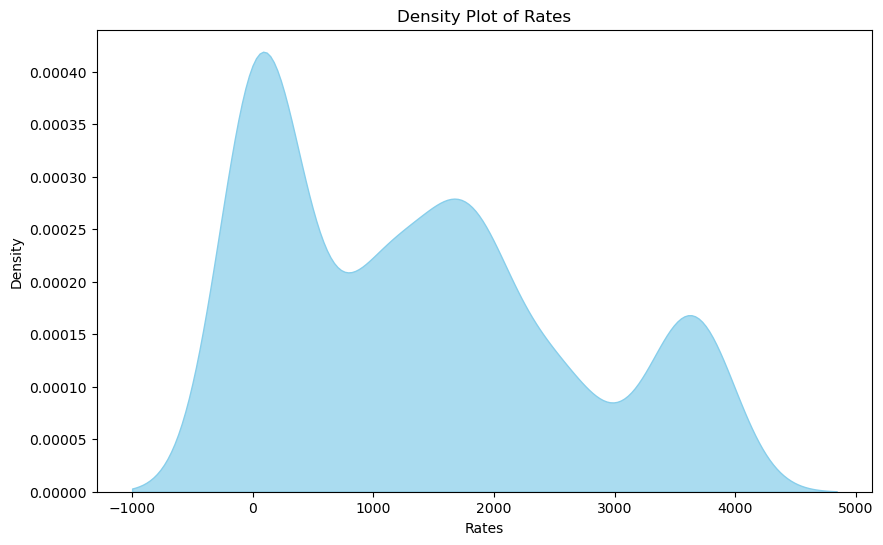

In [227]:
# Creating a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Rates'], fill=True, color='skyblue', alpha=0.7)
plt.title('Density Plot of Rates')
plt.xlabel('Rates')
plt.ylabel('Density')
plt.show()

## CHECKING FOR OUTLIERS IN THE RATES COLUMN

In [228]:
# Calculating z-scores
z_scores = (data['Rates'] - data['Rates'].mean()) / data['Rates'].std()

# Identifing outliers using z-scores (threshold = 3)
outliers_z = data[np.abs(z_scores) > 3]['Rates']

# Calculating the IQR (Interquartile Range)
Q1 = data['Rates'].quantile(0.25)
Q3 = data['Rates'].quantile(0.75)
IQR = Q3 - Q1

# Identifing outliers using IQR method
outliers_iqr = data[(data['Rates'] < Q1 - 1.5 * IQR) | (data['Rates'] > Q3 + 1.5 * IQR)]['Rates']

# Print the result
if len(outliers_z) > 0 or len(outliers_iqr) > 0:
    print(f"There are {len(outliers_z) + len(outliers_iqr)} outliers in the 'Rates' column.")
    print(f"Outliers using z-scores:\n{outliers_z}")
    print(f"Outliers using IQR method:\n{outliers_iqr}")
else:
    print("There are no outliers in the 'Rates' column.")

There are no outliers in the 'Rates' column.


In [229]:
data.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Element Code,Element,ISO Currency Code,Currency,Year Code,Year,Months Code,Months,Unit,Rates,Flag
1,UGA,1987-01-01,1987-12-31,226.0,'800,Uganda,LCU,Local currency units per USD,UGX,Uganda Shilling,1987.0,1987,7021.0,Annual value,NaN,42.841267,X
2,UGA,1987-01-01,1987-01-31,226.0,'800,Uganda,LCU,Local currency units per USD,UGX,Uganda Shilling,1987.0,1987,7001.0,January,NaN,42.841267,X
3,UGA,1987-02-01,1987-02-28,226.0,'800,Uganda,LCU,Local currency units per USD,UGX,Uganda Shilling,1987.0,1987,7002.0,February,NaN,14.000000,X
4,UGA,1987-03-01,1987-03-31,226.0,'800,Uganda,LCU,Local currency units per USD,UGX,Uganda Shilling,1987.0,1987,7003.0,March,NaN,14.000000,X
5,UGA,1987-04-01,1987-04-30,226.0,'800,Uganda,LCU,Local currency units per USD,UGX,Uganda Shilling,1987.0,1987,7004.0,April,NaN,14.000000,X


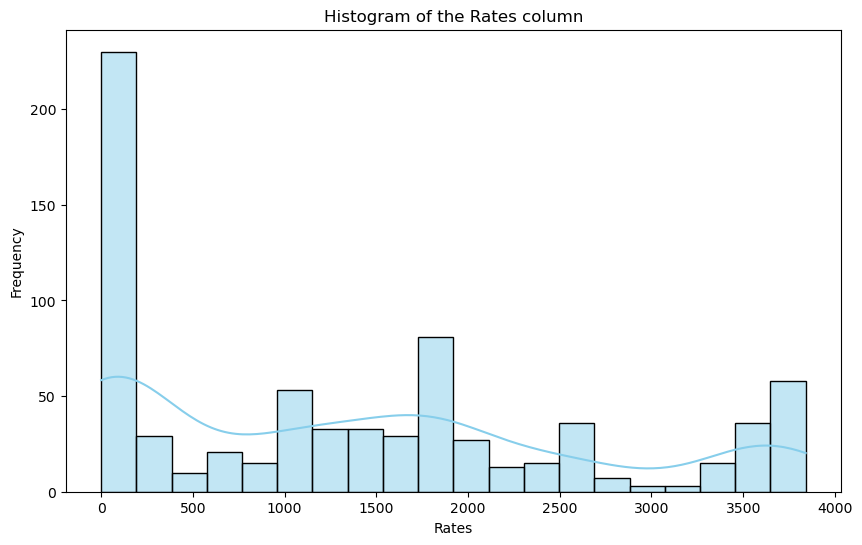

In [230]:
# Generating a histogram of Rates
plt.figure(figsize=(10, 6))
sns.histplot(data['Rates'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of the Rates column')
plt.xlabel('Rates')
plt.ylabel('Frequency')
plt.show()

## Checking for percentiles

In [231]:
# Filtering out non-numeric values in the 'Rates' column
data = data[data['Rates'].apply(pd.to_numeric, errors='coerce').notna()]

# Converting the 'Rates' column to float
data['Rates'] = data['Rates'].astype(float)

# Calculating specific percentiles
percentiles = [25, 50, 75]
percentile_values = np.percentile(data['Rates'], percentiles)

# Print the results
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")

25th percentile: 93.83923713
50th percentile: 1196.34
75th percentile: 2098.56633399208


## EXERCISE 1(b)

Creating List Rates

In [232]:
# Creating a list from the 'Rates' column
rates_list = data['Rates'].tolist()

# Print the first few elements of the list
print("Rates list:")
print(rates_list[:10])  # Adjusting the slice to show the desired number of elements (10)

Rates list:
[42.8412666667, 42.8412666667, 14.0, 14.0, 14.0, 38.0952, 60.0, 60.0, 60.0, 60.0]


## EXERCISE 2
## CALCULATING ALL MEASURES OF CENTRAL TENDENCY

In [233]:
# Calculate measures of central tendency
mean_rate = data['Rates'].mean()
median_rate = data['Rates'].median()
mode_rate = data['Rates'].mode()

# Displaying the results
print(f"Mean of the 'Rates' column: {mean_rate}")
print(f"Median of the 'Rates' column: {median_rate}")
print(f"Mode of the 'Rates' column:\n{mode_rate}")

Mean of the 'Rates' column: 1383.3367407705653
Median of the 'Rates' column: 1196.34
Mode of the 'Rates' column:
0        7.021450
1        7.135950
2        7.143000
3        7.143000
4        7.143000
5        8.735330
6        9.751609
7       16.613378
8       21.391457
9       33.571033
10      59.478779
11      60.000000
12      93.839237
13     118.304588
14     165.148394
15     266.726793
16     672.020000
17    1400.000000
Name: Rates, dtype: float64


In [234]:
# Calculate measures of dispersion or variability
std_dev_rate = data['Rates'].std()
variance_rate = data['Rates'].var()
range_rate = data['Rates'].max() - data['Rates'].min()
Q1 = data['Rates'].quantile(0.25)
Q3 = data['Rates'].quantile(0.75)
IQR_rate = Q3 - Q1

# Display the results
print(f"Standard Deviation of the Rates: {std_dev_rate}")
print(f"Variance of the Rates: {variance_rate}")
print(f"Range of the Rates: {range_rate}")
print(f"Interquartile Range (IQR) of the Rates: {IQR_rate}")

Standard Deviation of the Rates: 1251.5798686605576
Variance of the Rates: 1566452.1676363784
Range of the Rates: 3840.40653550001
Interquartile Range (IQR) of the Rates: 2004.7270968620803


#### In my case, the variance of 1564355.18 suggests that there is a considerable amount of variability or dispersion in the 'Rates' column, and individual values deviate from the mean by a significant amount.

## Exercise 3: Calculating more statistics

In [235]:
# Coefficient of Variation
cv_rate = (data['Rates'].std() / data['Rates'].mean()) * 100

# Quartile Coefficient of Dispersion
qcd_rate = (data['Rates'].quantile(0.75) - data['Rates'].quantile(0.25)) / (data['Rates'].quantile(0.75) + data['Rates'].quantile(0.25))

# Percentiles
percentiles = [10, 25, 50, 75]
percentile_values = np.percentile(data['Rates'], percentiles)

# Skewness
skewness_rate = data['Rates'].skew()

# Displaying the results
print(f"Coefficient of Variation of the Rates: {cv_rate}%")
print(f"Quartile Coefficient of Dispersion of the Rates: {qcd_rate}")
print(f"Percentiles (10th, 25th, 50th, 75th) of the Rates: {percentile_values}")
print(f"Skewness of the Rates: {skewness_rate}")

Coefficient of Variation of the Rates: 90.47543029641398%
Quartile Coefficient of Dispersion of the Rates: 0.9143960968116198
Percentiles (10th, 25th, 50th, 75th) of the Rates: [   7.14300001   93.83923713 1196.34       2098.56633399]
Skewness of the Rates: 0.5399736628690917


##### A Coefficient of Variation of 90.48% indicates a relatively high degree of variability in relation to the mean.

In [236]:
# Display all columns in the dataset
print("All columns in the dataset:")
print(data.columns)

All columns in the dataset:
Index(['Iso3', 'StartDate', 'EndDate', 'Area Code', 'Area Code (M49)', 'Area',
       'Element Code', 'Element', 'ISO Currency Code', 'Currency', 'Year Code',
       'Year', 'Months Code', 'Months', 'Unit', 'Rates', 'Flag'],
      dtype='object')


In [237]:
# Display data types of all columns
print("Data types of all columns:")
print(data.dtypes)

Data types of all columns:
Iso3                  object
StartDate             object
EndDate               object
Area Code            float64
Area Code (M49)       object
Area                  object
Element Code          object
Element               object
ISO Currency Code     object
Currency              object
Year Code            float64
Year                  object
Months Code          float64
Months                object
Unit                  object
Rates                float64
Flag                  object
dtype: object


#### Covariance:

##### To calculate covariance, we need to compare the rates column against another variable and that is why we choose to compare it with the year. We are coding the dates into a categorical variable

In [238]:
# Since 'StartDate' contains dates
dates_coded = data['StartDate']

# Creating a DataFrame with the 'StartDate' column
data = pd.DataFrame(dates_coded)

# Converting 'StartDate' to a categorical variable and obtain the codes
data['date_categorical'] = pd.factorize(data['StartDate'])[0]

# Creating a list of coded dates
coded_dates = data['date_categorical'].tolist()

# Displaying the output
print(f'A list of coded dates: \n{coded_dates}')


A list of coded dates: 
[0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 

### To visualize the confidence interval of the Rates column using a function below

In [239]:
def calculate_confidence_interval(y, confidence=0.95):
    # Calculate mean and standard error of the mean
    mean = np.mean(y)
    std_error = stats.sem(y)

    # Calculate confidence interval
    interval = stats.norm.interval(confidence, loc=mean, scale=std_error)

    return interval

confidence_interval = calculate_confidence_interval(rates_list)

print(f"Confidence Interval: {confidence_interval}")

Confidence Interval: (1293.5842811303853, 1473.0892004107452)


##### The Lower Bound (1293.5842811303853): This is the lower limit of the confidence interval. It suggests that we are 95% confident that the true population parameter (whatever is being estimated) is greater than or equal to 1293.58.

##### Upper Bound (1473.0892004107452): This is the upper limit of the confidence interval. It suggests that we are 95% confident that the true population parameter is less than or equal to 1473.09.

##### Range: The entire range between the lower and upper bounds (1473.09 - 1293.58) represents the range within which we believe the true population parameter lies with 95% confidence.

##### Confidence Level (95%): The confidence level represents the probability that the confidence interval contains the true parameter. In this case, it's 95%

In [240]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(rates_list, coded_dates)

# Output the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check for significance
if p_value < 0.05:
    print("The means of at least two groups are significantly different.")
else:
    print("No significant differences found between the group means.")

F-statistic: 528.537434353525
P-value: 2.2834715970394953e-100
The means of at least two groups are significantly different.


##### Reults show a high F-statistic coupled with an extremely low p-value suggests that there is strong evidence to reject the null hypothesis. This implies that the overall groups being compared have a statistically significant effect. It's an indication that the variables in my analysis are contributing significantly to explaining the variability in the data.

## To check for covariance between rates and dates

In [241]:
covariance = np.cov(rates_list, coded_dates)[0, 1]
print(f'The covariance for the  rates and dates is: {covariance}')

The covariance for the  rates and dates is: -29452.270262036727


##### This signifies an inverse relationship between the rates and dates. In simpler terms, as one variable (perhaps rates) increases, the other variable (dates) tends to decrease, and vice versa. The magnitude of the covariance value is also significant, suggesting a relatively strong relationship between the two variables.

#### THE END ####